In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 2)

In [2]:
data = pd.read_csv("results.csv")
better_datasets = pd.read_csv("results_fixed.csv")
better_datasets
data = data[~data['train dataset'].isin(['nslkdd', 'unswnb15'])]
data = pd.concat([data, better_datasets], ignore_index=True)
data["model"] = data["model"].str.replace(".pkl","")
data.head(20)

,model,train dataset,test dataset,features,accuracy,precision,recall,FPR,F1 score,notes
0,dddqn,cicids2017,cicddos2019,6,0.66,0.83,0.72,0.56,0.77,NaN
1,dddqn,cicids2017,cicdos2017,6,0.33,0.29,0.99,0.92,0.45,NaN
2,dddqn,cicids2017,cicids2017,6,0.71,0.80,0.85,0.85,0.82,NaN
3,double_dqn,cicids2017,cicddos2019,6,0.44,0.56,0.60,0.85,0.58,NaN
4,double_dqn,cicids2017,cicdos2017,6,0.31,0.26,0.99,0.92,0.41,NaN
5,double_dqn,cicids2017,cicids2017,6,0.47,0.46,0.84,0.85,0.59,NaN
6,per_dddqn,cicids2017,cicddos2019,6,0.38,0.47,0.56,0.87,0.51,NaN
7,per_dddqn,cicids2017,cicdos2017,6,0.41,0.37,0.99,0.91,0.54,NaN
8,per_dddqn,cicids2017,cicids2017,6,0.55,0.58,0.84,0.86,0.69,NaN
9,pn_dddqn,cicids2017,cicddos2019,6,0.48,0.28,0.90,0.63,0.43,NaN


In [3]:
data['accuracy'] = data['accuracy'].map(lambda x: x * 100)
data['precision'] = data['precision'].map(lambda x: x * 100)
data['recall'] = data['recall'].map(lambda x: x * 100)
data['FPR'] = data['FPR'].map(lambda x: x * 100)

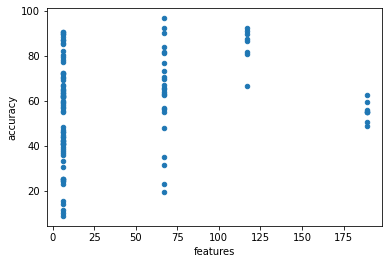

In [4]:
# features related to accuracy
data.plot(kind='scatter', x='features', y='accuracy')
plt.savefig("./images/naive_features.png")

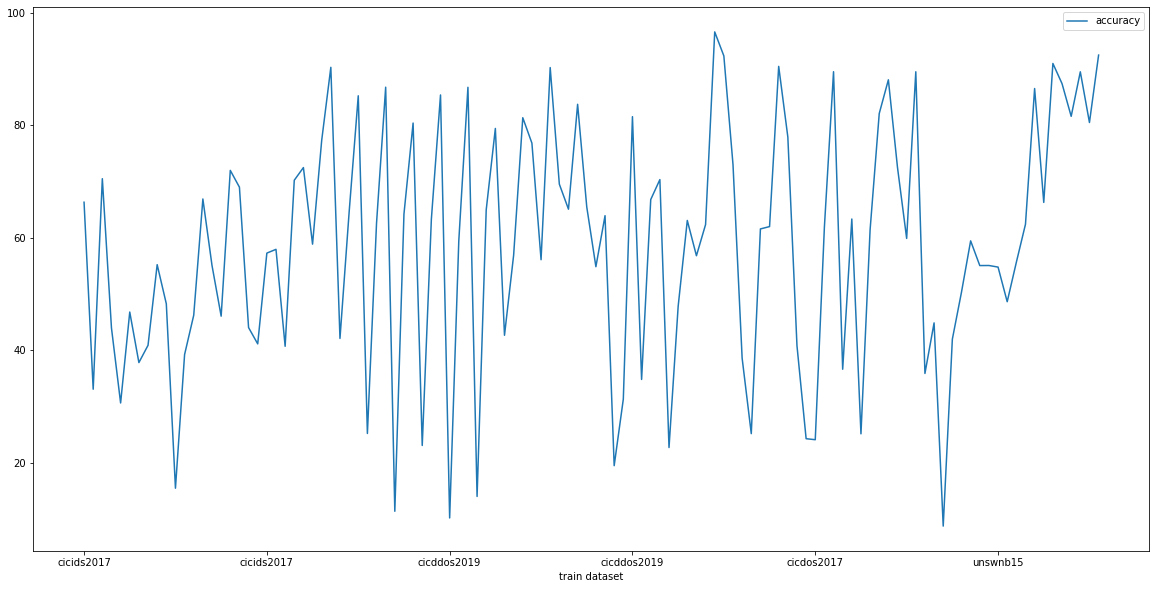

In [5]:
ax = plt.gca()
data.plot(kind='line',x='train dataset',y='accuracy',ax=ax, figsize=(20,10))
plt.savefig("./images/naive_accuracy_per_dataset.png")

In [6]:
data['model'].unique()

array(['dddqn', 'double_dqn', 'per_dddqn', 'pn_dddqn', 'dueling_dqn',
       'pn_per_dddqn', 'vanilla_dqn', 'a2c'], dtype=object)

In [7]:
vanilla_dqn_df = data.loc[data['model'] == 'vanilla_dqn']
double_dqn_df = data.loc[data['model'] == 'double_dqn']
dueling_dqn_df = data.loc[data['model'] == 'dueling_dqn']
dddqn_df = data.loc[data['model'] == 'dddqn']
per_dddqn_df = data.loc[data['model'] == 'per_dddqn']
pn_per_dddqn_df = data.loc[data['model'] == 'pn_per_dddqn']
pn_dddqn_df = data.loc[data['model'] == 'pn_dddqn']
a2c_df = data.loc[data['model'] == 'a2c']
separated_dfs = [ vanilla_dqn_df, double_dqn_df, dueling_dqn_df, dddqn_df, per_dddqn_df, pn_per_dddqn_df, pn_dddqn_df, a2c_df]

In [8]:
a2c_df.head(5)

,model,train dataset,test dataset,features,accuracy,precision,recall,FPR,F1 score,notes
21,a2c,cicids2017,cicddos2019,6,57.94,81.69,65.66,88.37,0.73,NaN
22,a2c,cicids2017,cicdos2017,6,40.69,37.29,98.63,91.15,0.54,NaN
23,a2c,cicids2017,cicids2017,6,70.24,79.62,84.37,86.05,0.82,NaN
45,a2c,cicddos2019,cicddos2019,6,79.46,70.72,99.26,39.63,0.83,NaN
46,a2c,cicddos2019,cicdos2017,6,42.65,42.50,92.11,95.09,0.58,NaN


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


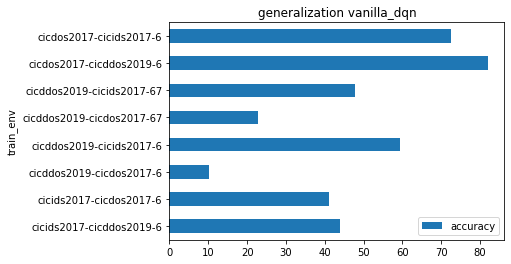

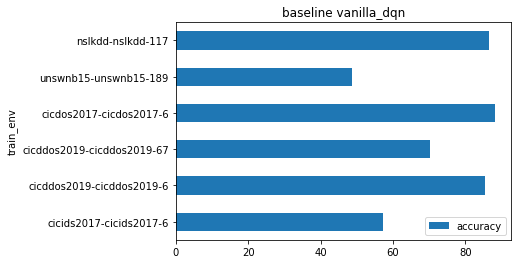

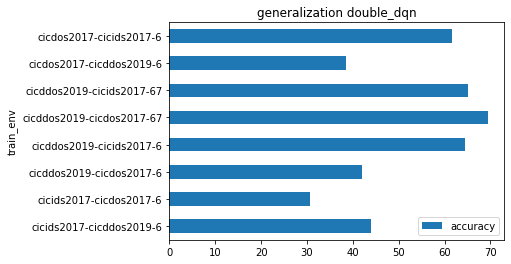

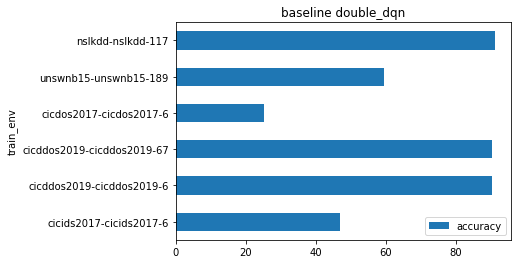

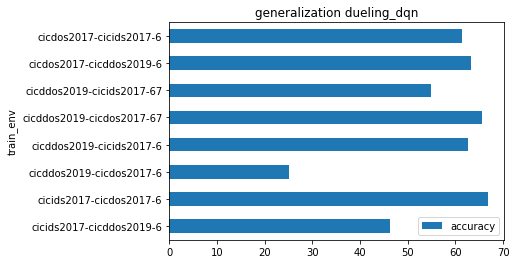

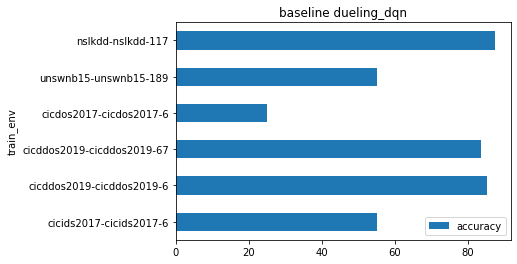

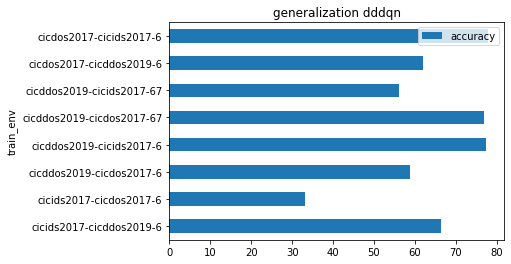

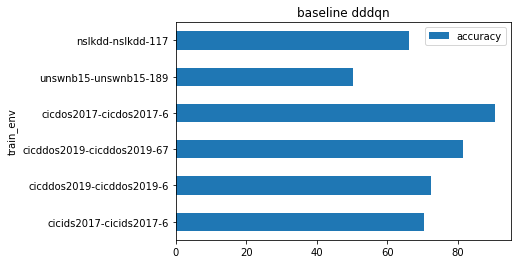

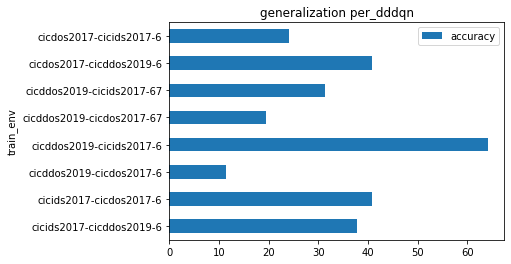

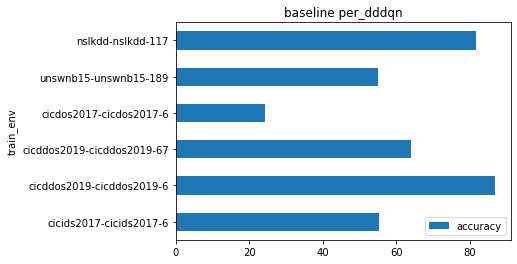

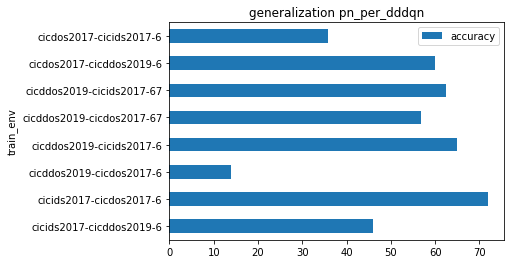

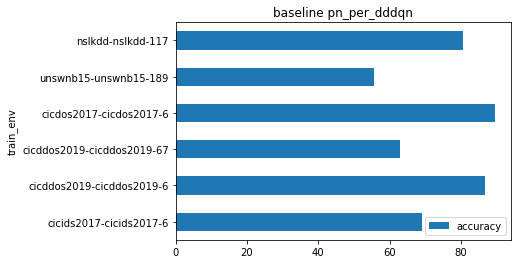

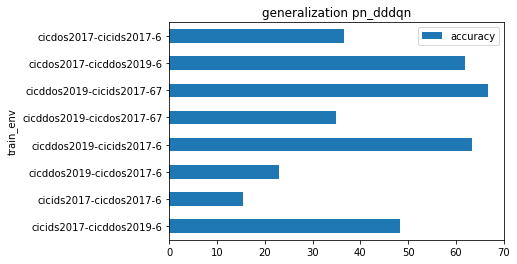

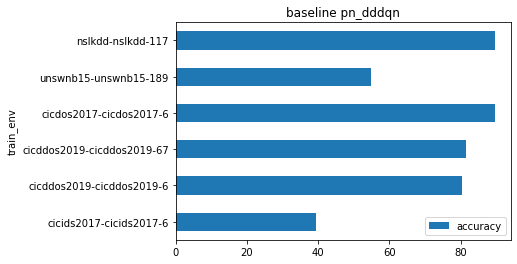

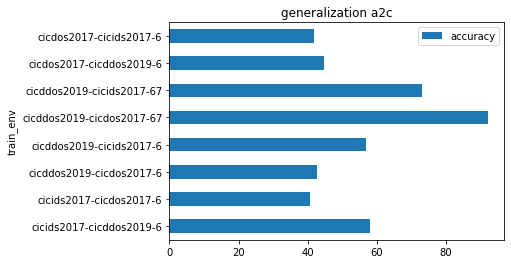

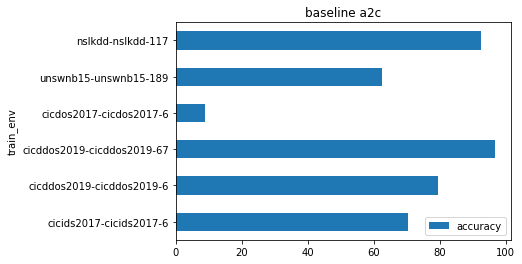

In [9]:
for df in separated_dfs:
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    
    generalization_df.plot(kind='barh', x='train_env', y='accuracy', title='generalization ' + df['model'].iloc[0])
    plt.savefig(f"./images/naive_generalization_{df['model'].iloc[0]}.png")
    baseline_df.plot(kind='barh', x='train_env', y='accuracy', title='baseline ' + df['model'].iloc[0])
    plt.savefig(f"./images/naive_baseline_{df['model'].iloc[0]}.png")

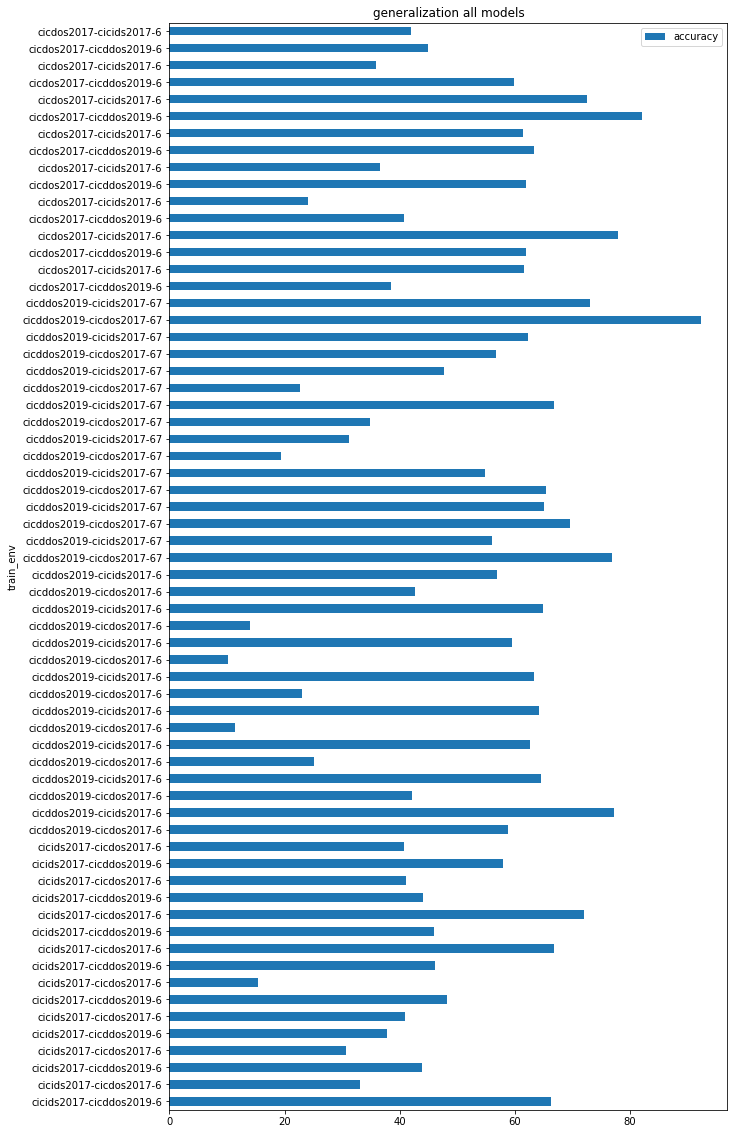

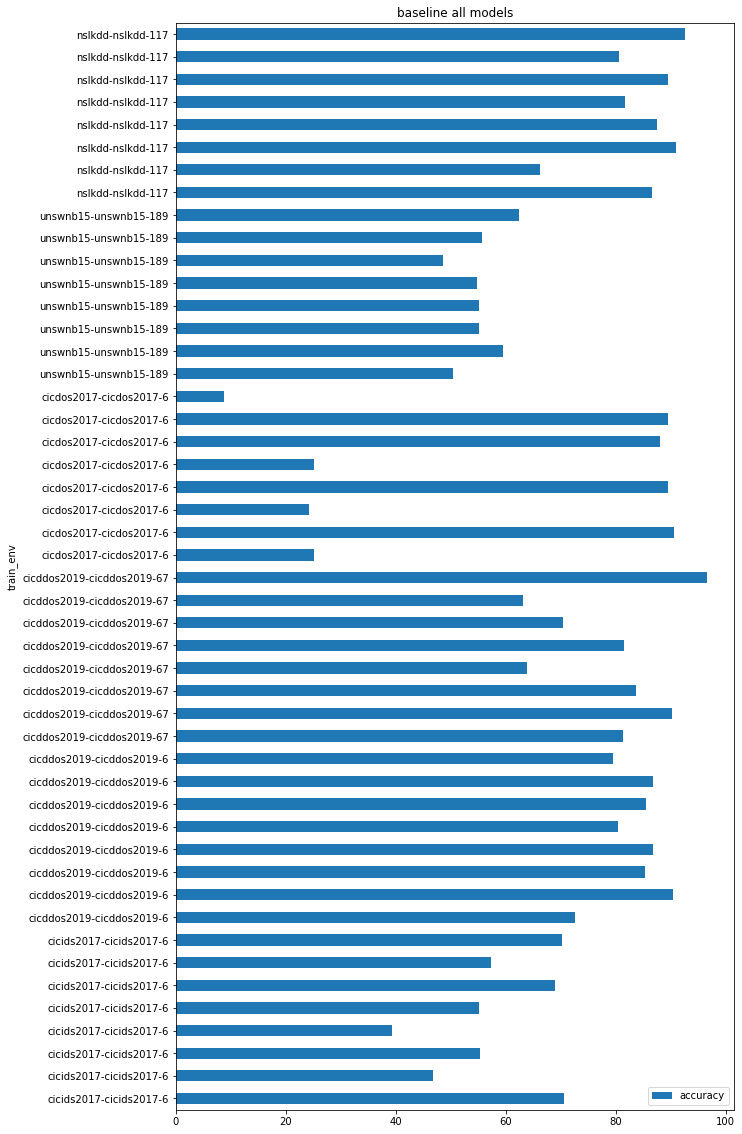

In [10]:
data['train_env'] =  data["train dataset"] + "-" + data["test dataset"] + "-" + data['features'].astype(str)
generalization_df = data.loc[data['train dataset'] != data['test dataset']]
baseline_df = data.loc[data['train dataset'] == data['test dataset']]
generalization_df.plot(kind='barh', x='train_env', y='accuracy', title='generalization all models', figsize=(10,20))
plt.savefig(f"./images/naive_generalization_all.png")
baseline_df.plot(kind='barh', x='train_env', y='accuracy', title='baseline all models', figsize=(10,20))
plt.savefig(f"./images/naive_baseline_all.png")

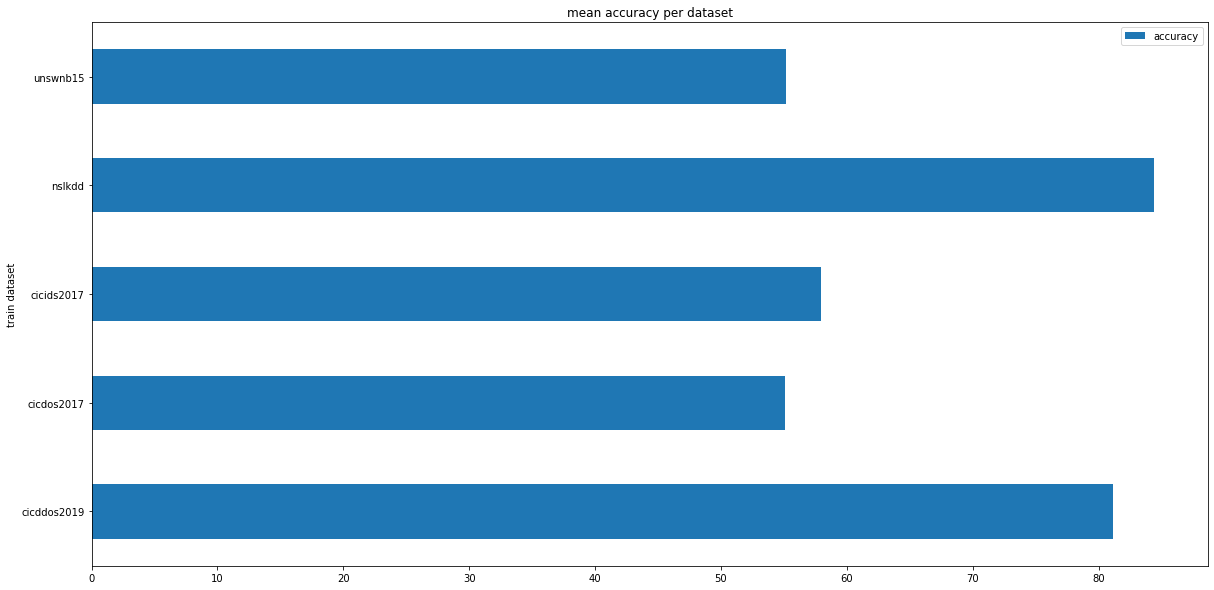

In [11]:
grouped_baseline_df = baseline_df.groupby(['train dataset']).mean()
grouped_baseline_df.plot(kind='barh',  y='accuracy', title='mean accuracy per dataset', figsize=(20,10))
plt.savefig(f"./images/naive_baseline_mean_accuracy.png")

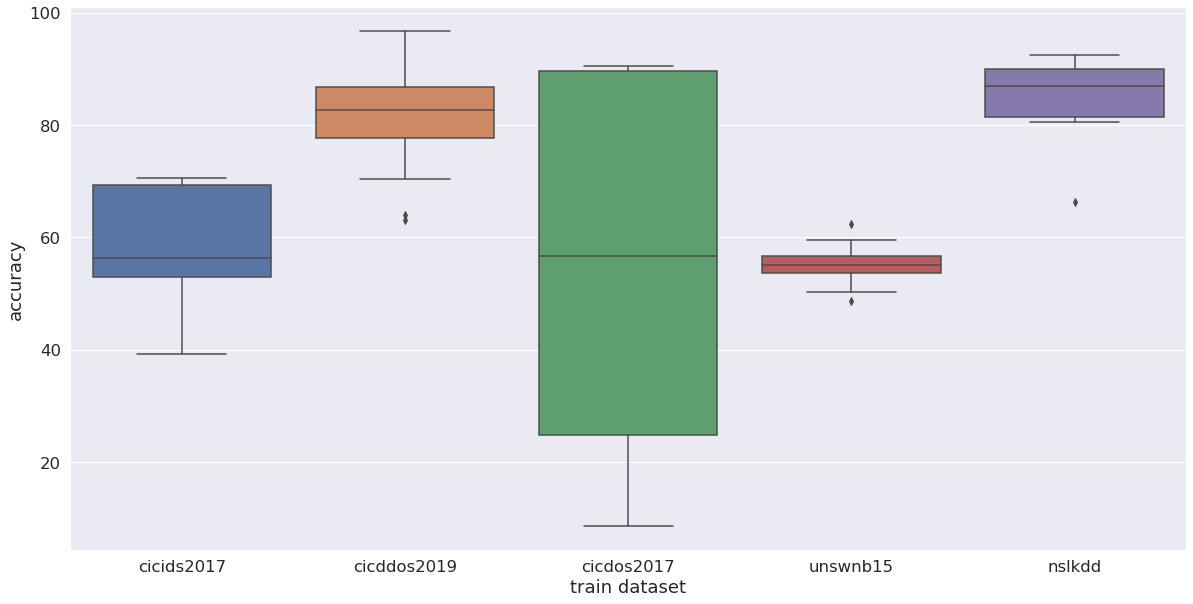

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'train dataset', y = 'accuracy', data = baseline_df)
plt.savefig(f"./images/naive_baseline_accuracy_boxplot_dataset.png")

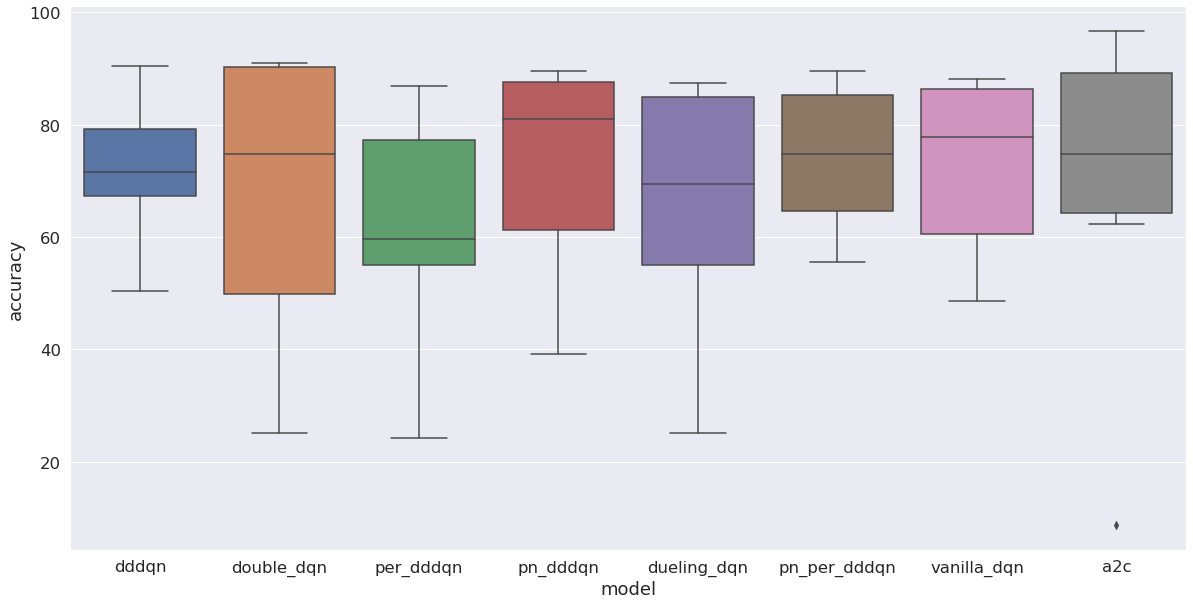

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'model', y = 'accuracy', data = baseline_df)
plt.savefig(f"./images/naive_baseline_accuracy_boxplot_model.png")

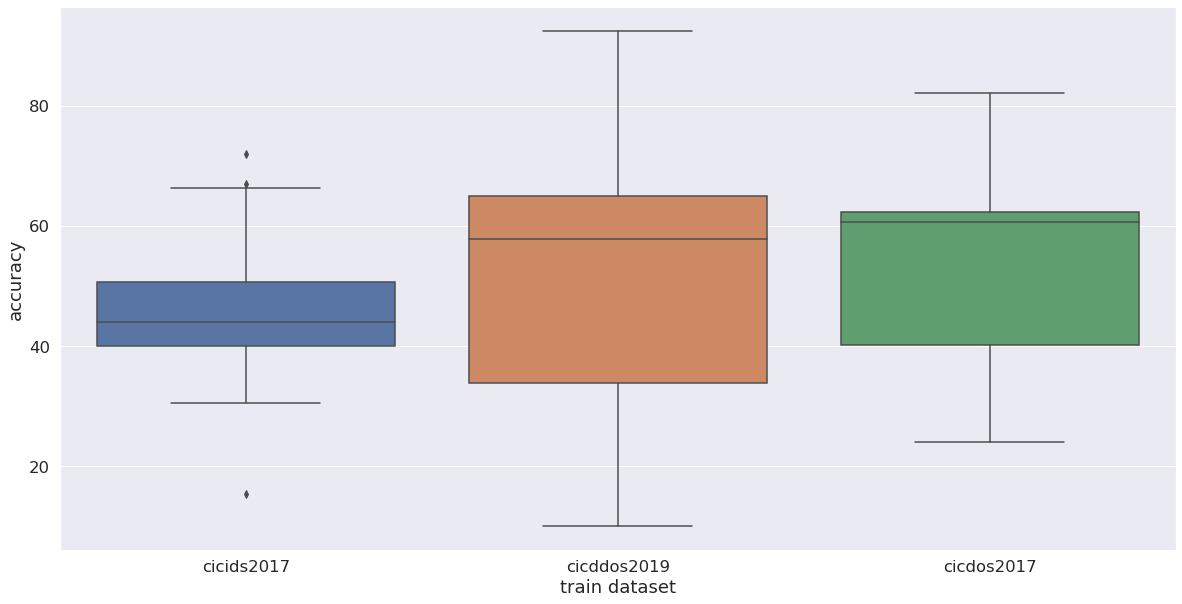

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'train dataset', y = 'accuracy', data = generalization_df)
plt.savefig(f"./images/naive_generalization_accuracy_boxplot_datasets.png")

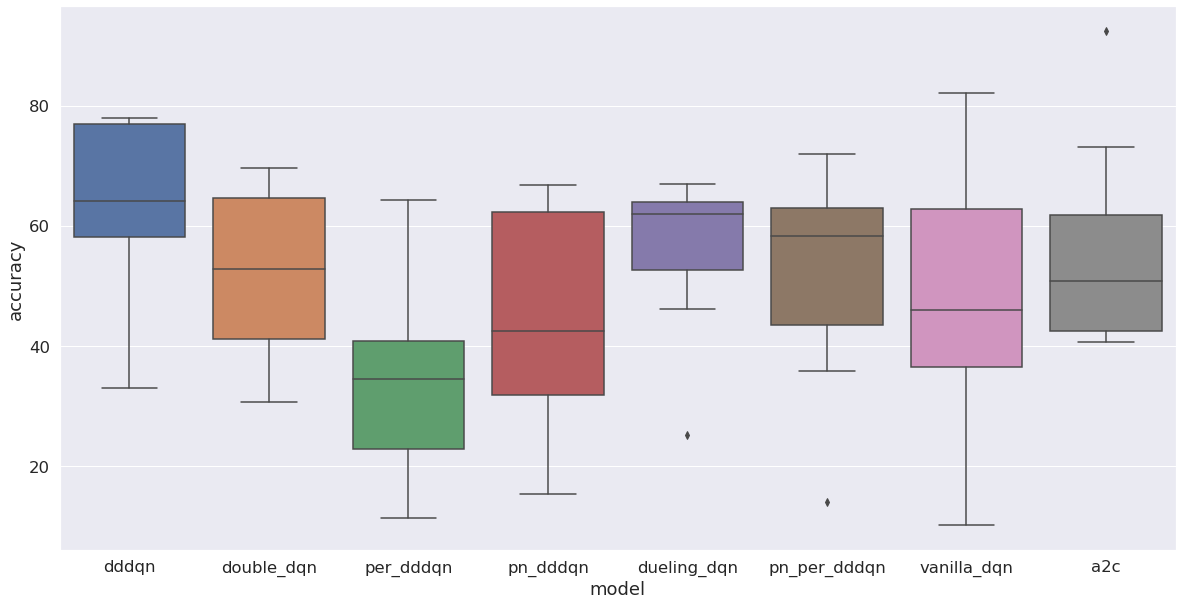

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'model', y = 'accuracy', data = generalization_df)
plt.savefig(f"./images/naive_generalization_accuracy_boxplot_models.png")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

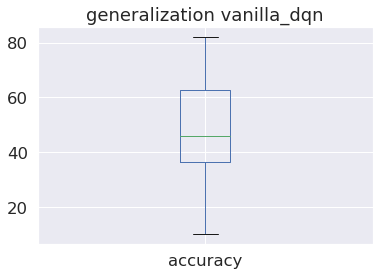

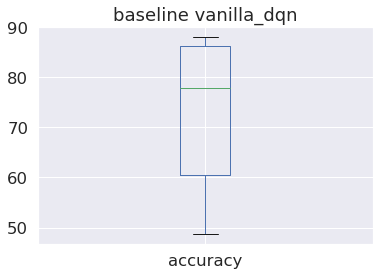

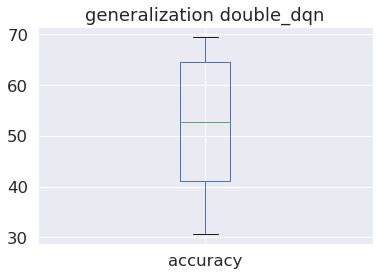

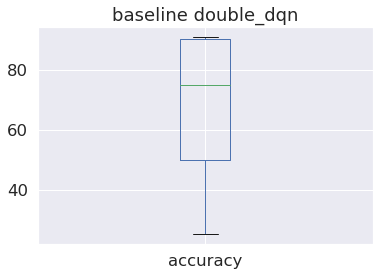

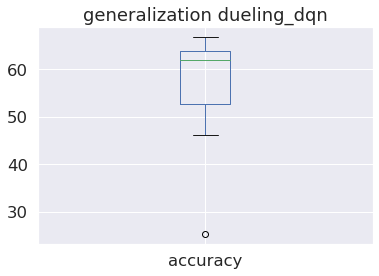

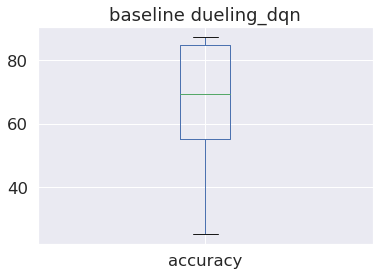

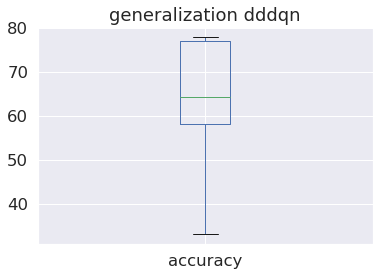

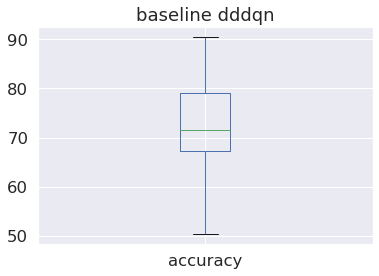

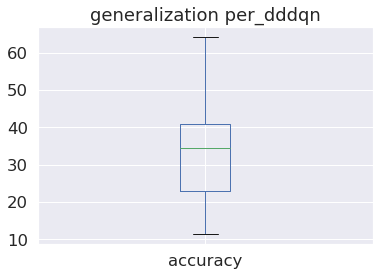

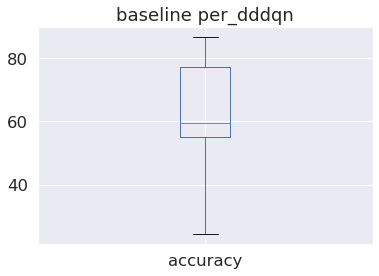

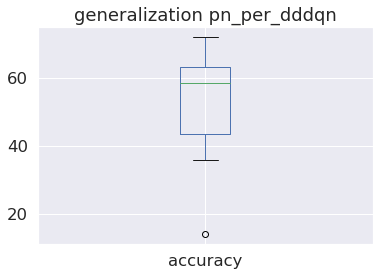

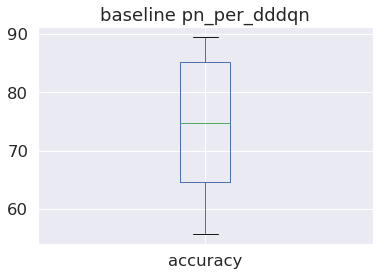

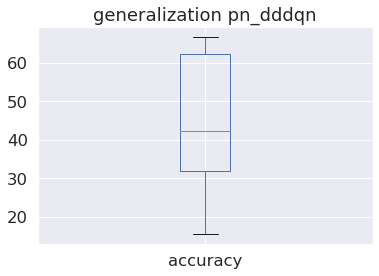

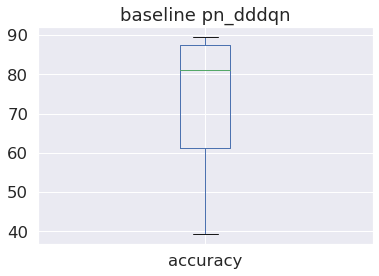

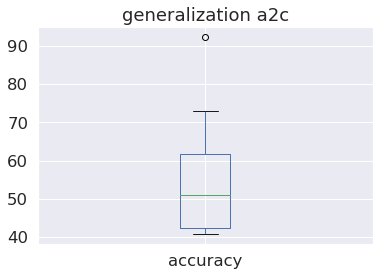

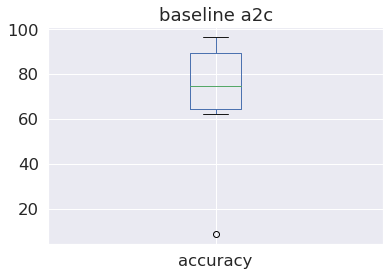

In [16]:
for df in separated_dfs:
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    generalization_df.plot(kind='box', x='train_env', y='accuracy', title='generalization ' + df['model'].iloc[0])
    plt.savefig(f"./images/naive_generalization_boxplot_{df['model'].iloc[0]}.png")
    baseline_df.plot(kind='box', x='train_env', y='accuracy', title='baseline ' + df['model'].iloc[0])
    plt.savefig(f"./images/naive_baseline_boxplot_{df['model'].iloc[0]}.png")

In [17]:
f = open('/project/masterproef-machine-learning-for-network-intrusion-detection/scripts/tex-files/tables.tex', 'a')
for i, df in enumerate(separated_dfs):
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    b_model = baseline_df['model'].iloc[0]
    g_model = generalization_df['model'].iloc[0]
    generalization_df = generalization_df.drop(columns=['notes', 'model', 'train_env'])
    baseline_df = baseline_df.drop(columns=['notes', 'test dataset', 'model', 'train_env'])
    generalization_df = generalization_df.sort_values(by=['train dataset', 'features', 'accuracy'], ascending=False)
    baseline_df = baseline_df.sort_values(by=['train dataset', 'features','accuracy'], ascending=False)
    base_tex = baseline_df.to_latex(index=False)
    gen_tex = generalization_df.to_latex(index=False)
    f.write(f"==========={b_model}===========\n")
    f.write(f"\\begin{{table}}[H]\n\\centering\n\\captionsetup{{justification=centering}}\n\\caption[Baseline metrics {b_model}]{{Baseline metrics {b_model}}}\n\\label{{tab:{b_model}_base}}\n\\resizebox{{\\textwidth}}{{!}}{{%\n")
    f.write(base_tex)
    f.write(f"}}\n\\end{{table}}\n")
    f.write(f"\\begin{{table}}[H]\n\\centering\n\\captionsetup{{justification=centering}}\n\\caption[Generalization metrics {g_model}]{{Generalization metrics {g_model}}}\n\\label{{tab:{g_model}_gen}}\n\\resizebox{{\\textwidth}}{{!}}{{%\n")
    f.write(gen_tex)
    f.write(f"}}\n\\end{{table}}\n")
f.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
